# Descriptive Statistics - Goodlife Fitness Case Study
## Context :
The market research team at Golden Ratio is assigned the task to identify customer profiles for each membership offered by Goodlife Fitness. The market research team decides to investigate whether there are differences across the membership options with respect to customer characteristics. The team decides to collect data on individuals who purchased a membership at a Goodlife Fitness. The data is stored in the GoodlifeFitness.csv file.

## Objective :
Perform descriptive analysis to create a customer profile for each Goodlife Fitness membership option.

### The team identifies the following customer variables to study: 
  - Type: Basic, Care, or Premium membership options
  - Age: Age of the customer in years
  - Gender: Male or Female  
  - Education: Education of the customer in years 
  - MaritalStatus: Single or partnered 
  - WeeklyUse: The average number of times the customer plans to visit the gym each week
  - Fitness: Self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.
  - Income: Annual household income  
  - Kms: Average number of kms the customer expects to walk/run each week 


### Import the necessary libraries

In [1]:
# Load the necessary packages
import pandas as pd

### Read the dataset

In [2]:
# Load the GoodlifeFitness.csv Dataset
data = pd.read_csv('GoodlifeFitness.csv')

In [3]:
data.head()

,Type,Age,Gender,Education,MaritalStatus,WeeklyUse,Fitness,Income,Kms
0,Basic,18,Male,14,Single,3,4,29562,180
1,Basic,19,Male,15,Single,2,3,31836,121
2,Basic,19,Female,14,Partnered,4,3,30699,106
3,Basic,19,Male,12,Single,3,3,32973,137
4,Basic,20,Male,13,Partnered,4,2,35247,76


### Printing the basic information

In [4]:
# check for nulls and other basic info from the data
data.info

<bound method DataFrame.info of         Type  Age  Gender  Education MaritalStatus  WeeklyUse  Fitness  \
0      Basic   18    Male         14        Single          3        4   
1      Basic   19    Male         15        Single          2        3   
2      Basic   19  Female         14     Partnered          4        3   
3      Basic   19    Male         12        Single          3        3   
4      Basic   20    Male         13     Partnered          4        2   
..       ...  ...     ...        ...           ...        ...      ...   
175  Premium   40    Male         21        Single          6        5   
176  Premium   42    Male         18        Single          5        4   
177  Premium   45    Male         16        Single          5        5   
178  Premium   47    Male         18     Partnered          4        5   
179  Premium   48    Male         18     Partnered          4        5   

     Income  Kms  
0     29562  180  
1     31836  121  
2     30699  106  
3  

**Observations:**
- There are 180 observations and 9 columns (6 of them are numerical and 3 are categorical).
- All the column have 180 non-null values i.e. there are no missing values in the data.

## <span style="color:crimson">Univariate Analysis</span>

### Check the five point summary statistics

In [7]:
# check analytical summary of the dataset
data.describe()

,Age,Education,WeeklyUse,Fitness,Income,Kms
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,166.127778
std,6.943498,1.617055,1.084797,0.958869,16506.684226,83.438067
min,18.000000,12.000000,2.000000,1.000000,29562.000000,34.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,106.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,151.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,184.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,579.000000


**Observations:**

- Average age of customers is 29 years. And, the age ranges from 18 to 50.
- The average annual income of a customer is 53K. It has a range of values from 30K to 104K, which again shows a good diversity of customers.
- Median gym usage is 3 days, that means 50% of the cutstomer are going to use the gym for less than or equal to 3 days in a week.  

In [9]:
# check stats for categorical data
# data.describe(include='all')
data.describe(include='object')

,Type,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,Basic,Male,Partnered
freq,80,104,107


### Plotting distribution for numerical columns

<AxesSubplot:ylabel='Frequency'>

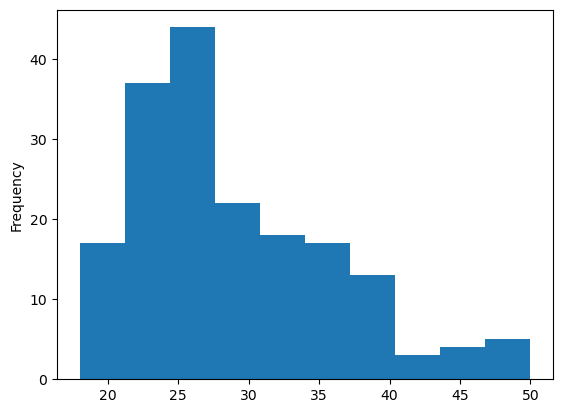

In [14]:
# Plot the distribution of Age
data['Age'].plot(kind='hist')

**Observations**
- The age distribution is also right skewed. there are few people with age greater than 40 who focus on their fitness.  
- Most of the customers are aged between 20 to 30, which signifies the people who are young tend to hit the gym more.

<AxesSubplot:>

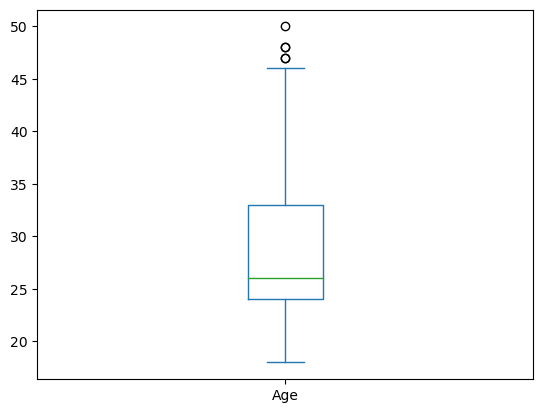

In [15]:
# plotting a boxplot for Age
data['Age'].plot(kind='box')

## <span style="color:crimson">Bivariate analysis</span>

<AxesSubplot:title={'center':'Income'}, xlabel='Type'>

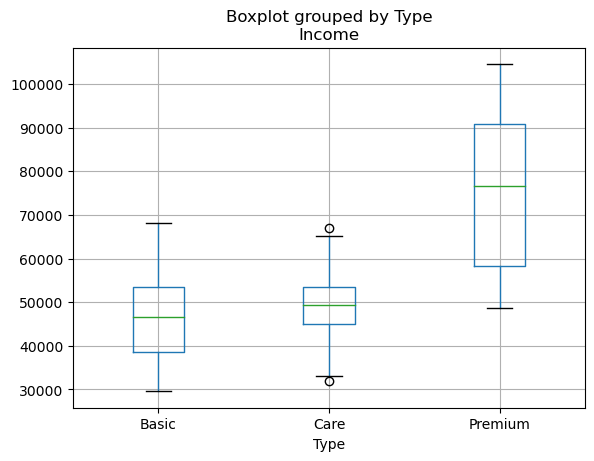

In [22]:
# plot a boxplot of income vs membership type
data.boxplot(by='Type', column='Income')

**Observation**
- Premium membership is bought by the people having an income range from 60K to 90k.
- Basic membership is mostly consider by the people who have lower income level.

##  <span style="color:crimson">Multi-Variate Analysis</span>

In [26]:
# Using .crosstab analyse data across Type, Gender, and MaritalStatus
pd.crosstab(data['Type'],[data['Gender'], data['MaritalStatus']], margins=True)

Gender           Female             Male         All
MaritalStatus Partnered Single Partnered Single     
Type                                                
Basic                27     13        21     19   80
Care                 15     14        21     10   60
Premium               4      3        19     14   40
All                  46     30        61     43  180

**Observation:**
- It can be clearly seen from the table that the Basic membership is popular among both males and females.
- Premium membership is popular among males. 

**Inference:**
- Market premium memberships to Male customers.

In [33]:
# using .pivot_table analyze data by membership type
pd.pivot_table(data, index='Type')

,Age,Education,Fitness,Income,Kms,WeeklyUse
Type,,,,,,
Basic,28.55,15.037500,2.9625,46418.025,133.300,3.087500
Care,28.90,15.116667,2.9000,48973.650,141.600,3.066667
Premium,29.10,17.325000,4.6250,75441.575,268.575,4.775000


In [34]:
# using .pivot_table analyze data by membership type and income
pd.pivot_table(data, index='Type', values='Income')

,Income
Type,
Basic,46418.025
Care,48973.650
Premium,75441.575


In [36]:
# using .pivot_table analyze data by membership type and weekly use
pd.pivot_table(data, index='Type', values='WeeklyUse')

,WeeklyUse
Type,
Basic,3.087500
Care,3.066667
Premium,4.775000


**Observations:**
- The average income of customers who bought Basic and Care is on the lower side as compared to the customers who bought Premium memberships.
- The people who bought Premium memberships, there is a big difference in the income level of the people

**Inference:**
- The Income variable is a good predictor to find the preference of the customers.

#### Let's check the exact value of correlation between the variables using correlation martix.


In [37]:
data.corr()

,Age,Education,WeeklyUse,Fitness,Income,Kms
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036400
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307264
WeeklyUse,0.015064,0.395155,1.000000,0.668606,0.519537,0.759018
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785404
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543094
Kms,0.036400,0.307264,0.759018,0.785404,0.543094,1.000000


<AxesSubplot:xlabel='Age', ylabel='Income'>

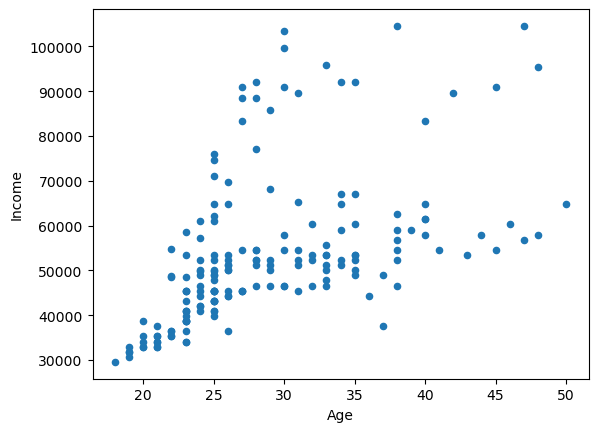

In [39]:
# Scatter plot using Pandas
data.plot.scatter(x='Age', y='Income')

**Observations:**
- Kms and WeeklyUse , kms and Fitness are highly correlated with each other, which makes sense as more useage, leads to more kms hence results better fitness.
- There is a high correlation between income and education too, signifies that the people with good education level tend to have higher income.
- Fitness and WeeklyUse are also highly correlated.


### Conclusions:
- Premium membership is the least sold product among the three. Also, it is preferred by customers who are planning to run more, having good fitness, and higher income range.
- Basic Membership is most popular which is preferred among customers having lower income range.
- Care Membership is slightly less popular than Basic.